In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
dataset =pd.read_csv(r"E:\tops\Data science\practical\loan.csv")
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

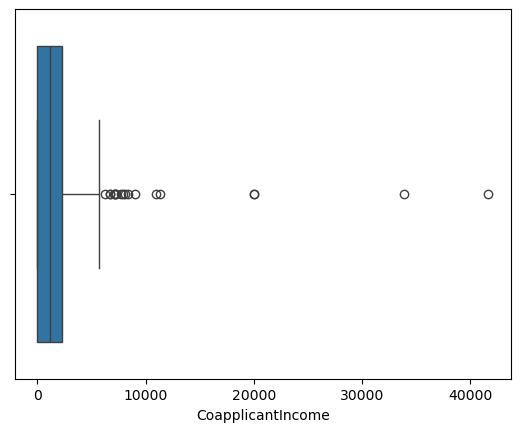

In [7]:
sns.boxplot(x = "CoapplicantIncome",data=dataset)
plt.show()

In [8]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Direct method

In [9]:
min_range = dataset["CoapplicantIncome"].mean() - (3 * dataset["CoapplicantIncome"].std())
max_range = dataset["CoapplicantIncome"].mean() + (3 * dataset["CoapplicantIncome"].std())
min_range,max_range

(np.float64(-7157.499309645475), np.float64(10399.990905699677))

In [10]:
new_data =dataset[dataset["CoapplicantIncome"]<= max_range]
new_data.shape

(608, 13)

Z_Score through

In [32]:
z_score = (dataset["CoapplicantIncome"] - dataset["CoapplicantIncome"].mean() ) / (dataset["CoapplicantIncome"].std())

In [33]:
dataset["z_score"]=z_score

In [34]:
dataset.drop(dataset[dataset["z_score"] > 3].index,inplace=True)

In [35]:
dataset.shape

(608, 14)